# HW1.1: Dictionary-based Tokenization


In this exercise, you are to implement a dictionary-based word segmentation algorithm. There are two Python functions that you need to complete:
<br>
* maximal_matching
* backtrack
</br>

Also, you have to find how to use word_tokenize() in PythaiNLP along with customer_dict by yourselves.

## TODO 1 - Your Maximal Matching with Your Dictionary

### Create a toy dictionary to test the algorithm

This is based on the example shown in the lecture.
You will tokenize the following text string: "ไปหามเหสี!"
The toy dictoionary provided in this exercise includes all the charaters, syllables, and words that appear that the text string.

In [240]:
thai_vocab = ["ไ","ป","ห","า","ม","เ","ห","ส","ี","ไป","หา","หาม","เห","สี","มเหสี","!"]

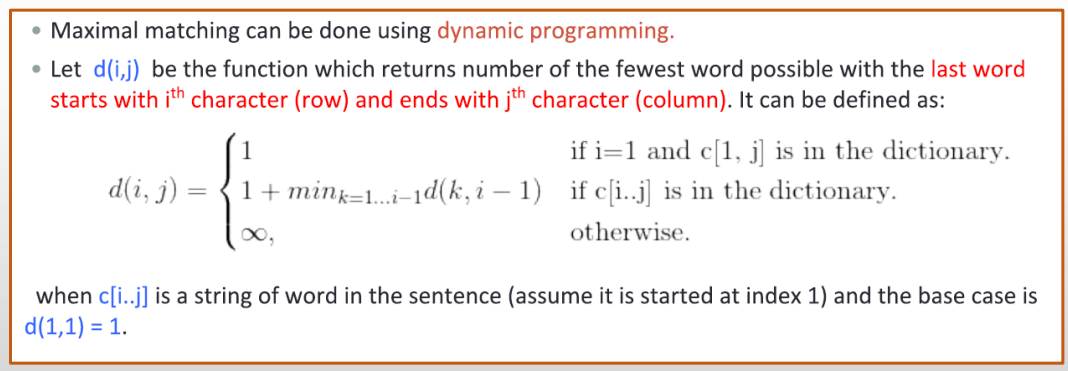

### Maximal matching
Complete the maximal matching  function below to tokenize the input text


In [241]:
# c is the character array
from math import inf #infinity
def maximal_matching(c):
    #Initialize an empty 2D list
    d  = [[None]*len(c) for _ in range(len(c))]

    ####FILL CODE HERE####
    for i in range(len(c)):                         # 'i' Row index
        for j in range(len(c)):                     # 'j' Column index
            temp = c[i:j+1]                         # Word index i to j+1
            if temp in thai_vocab:
                if i == 0:
                    d[i][j] = 1
                elif i > 0 :                        # Other row
                    d[i][j] = 1 + a
            elif j>=i :                             # Not in dict
                d[i][j] = inf
        a = min([row[i] for row in d if row[i]])    # Minimum value row 'i'
    ######################

    return d

###############################################################################################

### Backtracking
Complete the backtracking function below to find the tokenzied words.
It should return a list containing a pair of the beginning position and the ending position of each word.
In this example, it should return:
<br>
[(0, 1),(2, 3),(4, 8),(9, 9)]
<br>
#### Each pair contains the position of each word as follows:
(0, 1) ไป
<br>
(2, 3) หา
<br>
(4, 8) มเหสี
<br>
(9, 9) !


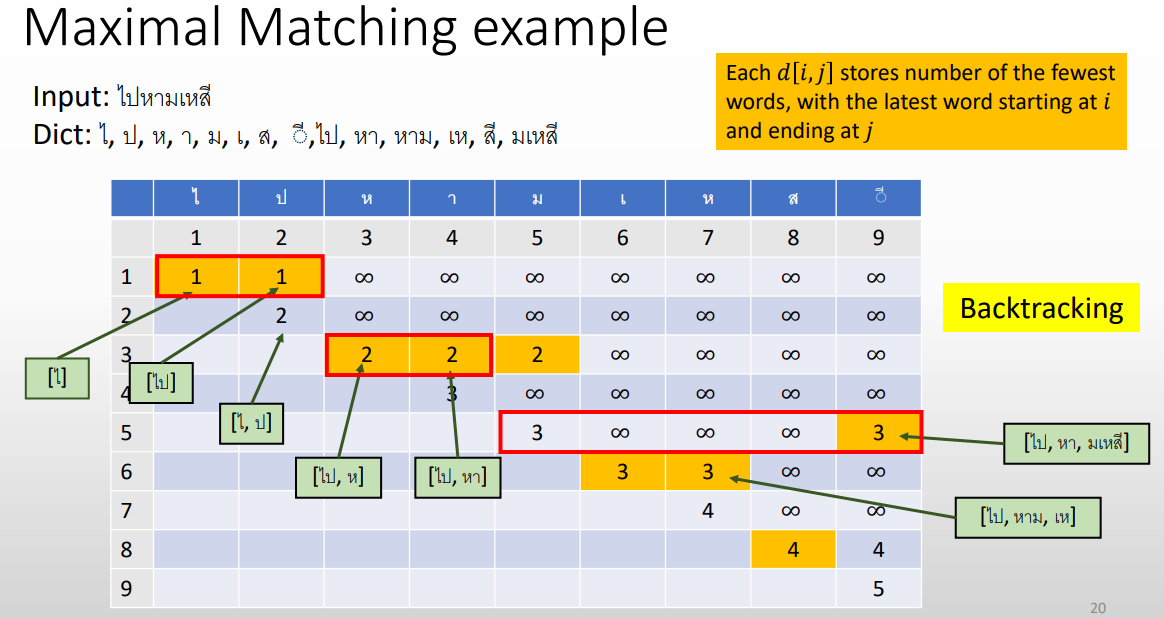

In [242]:
def backtrack(d):
    eow = len(d)-1 # End of Word position
    word_pos = [] # Word position
    ####FILL CODE HERE####

    temp = []
    temp2 = []
    for i in range(eow, -1, -1):              # Loop for checking index number that doesn't contain inf and None
        for j in range(eow, -1,-1):           # Assign to temp variable
            if d[i][j] != inf and d[i][j]:
                temp.append([i,j])

    temp = temp[::-1]                         # Reverse temp
    seen_idx = []                             # List of seen index
    for row, colm in temp:                                  # Loop check for unseen row and column
      if row not in seen_idx or colm not in seen_idx:
          seen_idx.extend(range(row, colm + 1))
          temp2.append([row, colm])

    temp2 = temp2[::-1]
    seen_pos = []                           # List for seen position (index)
    for pos in temp2:                       # Loop check for unseen position
        if pos[0] not in seen_pos and pos[1] not in seen_pos:
            seen_pos.extend(range(pos[0], pos[1] + 1))
            word_pos.append(pos)

    word_pos.reverse()
    return word_pos


### Test your maximal matching algorithm on a toy dictionary

Expected output:

[1, 1, inf, inf, inf, inf, inf, inf, inf, inf] ไ
<br>
[None, 2, inf, inf, inf, inf, inf, inf, inf, inf] ป
<br>
[None, None, 2, 2, 2, inf, inf, inf, inf, inf] ห
<br>
[None, None, None, 3, inf, inf, inf, inf, inf, inf] า
<br>
[None, None, None, None, 3, inf, inf, inf, 3, inf] ม
<br>
[None, None, None, None, None, 3, 3, inf, inf, inf] เ
<br>
[None, None, None, None, None, None, 4, inf, inf, inf] ห
<br>
[None, None, None, None, None, None, None, 4, 4, inf] ส
<br>
[None, None, None, None, None, None, None, None, 5, inf] ี
<br>
[None, None, None, None, None, None, None, None, None, 4] !
<br>

In [243]:
input_text = "ไปหามเหสี!"
out = maximal_matching(input_text)
for i in range(len(out)):
    print(out[i],input_text[i])

[1, 1, inf, inf, inf, inf, inf, inf, inf, inf] ไ
[None, 2, inf, inf, inf, inf, inf, inf, inf, inf] ป
[None, None, 2, 2, 2, inf, inf, inf, inf, inf] ห
[None, None, None, 3, inf, inf, inf, inf, inf, inf] า
[None, None, None, None, 3, inf, inf, inf, 3, inf] ม
[None, None, None, None, None, 3, 3, inf, inf, inf] เ
[None, None, None, None, None, None, 4, inf, inf, inf] ห
[None, None, None, None, None, None, None, 4, 4, inf] ส
[None, None, None, None, None, None, None, None, 5, inf] ี
[None, None, None, None, None, None, None, None, None, 4] !


### Test your backtracking algorithm on a toy dictionary
Expected output:
<br>
ไป|หา|มเหสี|!

In [244]:
def print_tokenized_text(d, input_text):
    tokenized_text=[]
    for pos in backtrack(d):
        print(pos)
        tokenized_text.append(input_text[pos[0]:pos[1]+1])
    print("|".join(tokenized_text))

print_tokenized_text(out,input_text)

[0, 1]
[2, 3]
[4, 8]
[9, 9]
ไป|หา|มเหสี|!


## TODO 2 - Your Maximal Matching with Real Dictionary

For UNIX-based OS users, the following cell will download a dictionary (it's just a list of thai words). Alternatively, you can download it from this link: https://raw.githubusercontent.com/PyThaiNLP/pythainlp/dev/pythainlp/corpus/words_th.txt

In [245]:
# !pip install wget

In [246]:
# !wget https://raw.githubusercontent.com/PyThaiNLP/pythainlp/dev/pythainlp/corpus/words_th.txt

In [247]:
# For my PC
import urllib.request

url = 'https://raw.githubusercontent.com/PyThaiNLP/pythainlp/dev/pythainlp/corpus/words_th.txt'
filename = 'words_th.txt'
urllib.request.urlretrieve(url, filename)


('words_th.txt', <http.client.HTTPMessage at 0x7de335a4aed0>)

In [248]:
with open("words_th.txt",encoding='utf-8-sig') as f:
    thai_vocab = f.read().splitlines()
print("Vocab size:", len(thai_vocab))
thai_vocab.extend(["ๆ","!","ไ","ป","ห","ม","ส"])


Vocab size: 62080


In [249]:
"ห" in thai_vocab

True

### The output of your maximal matching algoithm on a new dictionary
Expected output:
<br>
[1, 1, 100000, 1, 100000, 100000, 100000, 100000, 100000] ไ
<br>
[None, 2, 100000, 100000, 100000, 100000, 100000, 100000, 100000] ป
<br>
[None, None, 2, 2, 2, 100000, 100000, 100000, 100000] ห
<br>
[None, None, None, 100000, 100000, 100000, 100000, 100000, 100000] า
<br>
[None, None, None, None, 2, 100000, 100000, 100000, 2] ม
<br>
[None, None, None, None, None, 100000, 3, 100000, 100000] เ
<br>
[None, None, None, None, None, None, 100001, 100000, 100000] ห
<br>
[None, None, None, None, None, None, None, 4, 4] ส
<br>
[None, None, None, None, None, None, None, None, None] ี

In [250]:
input_text = "ไปหามเหสี"
out = maximal_matching(input_text)
for i in range(len(out)):
    print(out[i],input_text[i])

[1, 1, inf, 1, inf, inf, inf, inf, inf] ไ
[None, 2, inf, inf, inf, inf, inf, inf, inf] ป
[None, None, 2, 2, 2, inf, inf, inf, inf] ห
[None, None, None, inf, inf, inf, inf, inf, inf] า
[None, None, None, None, 2, inf, inf, inf, 2] ม
[None, None, None, None, None, inf, 3, inf, inf] เ
[None, None, None, None, None, None, inf, inf, inf] ห
[None, None, None, None, None, None, None, 4, 4] ส
[None, None, None, None, None, None, None, None, inf] ี


### Expected tokenized text
ไปหา|มเหสี

In [251]:
print_tokenized_text(out,input_text)

[0, 3]
[4, 8]
ไปหา|มเหสี


## TODO 3 - Maximal Matching from PythaiNLP

### Default dictionary

Study word_tokenize() from PythaiNLP in the link below.

https://pythainlp.org/docs/2.0/api/tokenize.html

In [3]:
# !pip install pythainlp
# !pip install marisa_trie

In [253]:
# import sys
# print(sys.executable)

In [254]:
# # For my python path
# !c:\Users\napat\AppData\Local\Programs\Python\Python311\python.exe -m pip install pythainlp
# !c:\Users\napat\AppData\Local\Programs\Python\Python311\python.exe -m pip install marisa_trie

In [1]:
from pythainlp.tokenize import word_tokenize, Trie
text='นัดกินกันตอนไหนก็ได้ที่สามย่านมิตรทาวน์'

####FILL CODE HERE####
print("Engine newmm: ", word_tokenize(text, engine="newmm"))
print("Engine longest: ", word_tokenize(text, engine="longest"))
print("Engine multi_cut: ", word_tokenize(text, engine="multi_cut"))
######################


Engine newmm:  ['นัด', 'กินกัน', 'ตอน', 'ไหน', 'ก็', 'ได้ที่', 'สามย่าน', 'มิตร', 'ทาวน์']
Engine longest:  ['นัด', 'กินกัน', 'ตอน', 'ไหน', 'ก็ได้', 'ที่สาม', 'ย่าน', 'มิตร', 'ทาวน์']
Engine multi_cut:  ['นัด', 'กินกัน', 'ตอน', 'ไหนก็ได้ที่สามย่านมิตรทาวน์']


### Custom dictionary

Add 'สามย่านมิตรทาวน์' into dictionary and then tokenize again

In [2]:
####FILL CODE HERE####
from pythainlp.corpus.common import thai_words

custom_words = ["สามย่านมิตรทาวน์"]

### Custom dict
custom_trie = Trie(custom_words)                                        # Create new Trie
token = word_tokenize(text, engine="newmm", custom_dict=custom_trie)    # Word tokenize by engine "newmm" and use custom dict
print("Size of custom dict: " ,len(custom_trie))
print("Custom dict : ",token)

### Add new word to dict
custom_words = thai_words().union(custom_words)                         # Use thai_words() for default dict and add custom_words to dict
custom_trie = Trie(custom_words)                                        # Create a new Trie
tokens = word_tokenize(text, engine="newmm", custom_dict=custom_trie)   # Word tokenize by engine "newmm" and use extended dict
print("\nSize of extended dict: ", len(custom_trie))
print("Add to default dict : ",tokens)


######################

Size of custom dict:  1
Custom dict :  ['นัดกินกันตอนไหนก็ได้ที่', 'สามย่านมิตรทาวน์']

Size of extended dict:  62080
Add to default dict :  ['นัด', 'กินกัน', 'ตอน', 'ไหน', 'ก็', 'ได้ที่', 'สามย่านมิตรทาวน์']
